## Neural network Homework 1  \   Q4 part A- efficient neural network

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

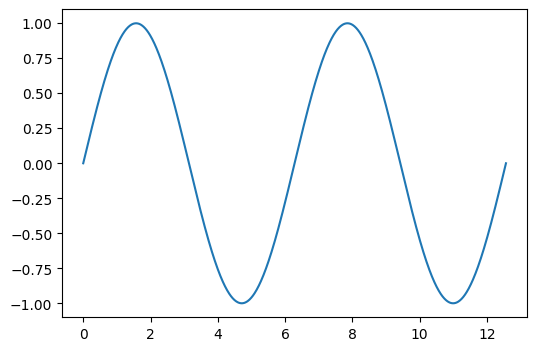

In [3]:
num_points = 1000
x_values = np.linspace(0, 4*np.pi, num_points)
y_values = np.sin(x_values)

plt.figure(figsize=(6,4))
plt.plot(x_values, y_values)
plt.show()

## part A : Training for training size = 900 and test size = 100

In [4]:
rgn = np.random.RandomState(5)

train_size = 900

data = np.stack((x_values, y_values), axis=0)
rgn.shuffle(data)
x_values_shuffled = data[0,:]
y_values_shuffled = data[0,:]

x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

X_test = torch.from_numpy(x_test)
Y_test = torch.from_numpy(y_test)



Epoch 100: Training Loss = 0.3156708776950836, Test Loss = 0.28041917085647583
Epoch 200: Training Loss = 0.2143182009458542, Test Loss = 0.18549303710460663
Epoch 300: Training Loss = 0.09926121681928635, Test Loss = 0.08546055853366852
Epoch 400: Training Loss = 0.06441215425729752, Test Loss = 0.05787312611937523
Epoch 500: Training Loss = 0.0580429844558239, Test Loss = 0.053297098726034164
Epoch 600: Training Loss = 0.053149934858083725, Test Loss = 0.04959776997566223
Epoch 700: Training Loss = 0.04758070781826973, Test Loss = 0.04451935738325119
Epoch 800: Training Loss = 0.04220897704362869, Test Loss = 0.039764732122421265
Epoch 900: Training Loss = 0.03764631599187851, Test Loss = 0.03543170541524887
Epoch 1000: Training Loss = 0.03593958169221878, Test Loss = 0.03668811172246933


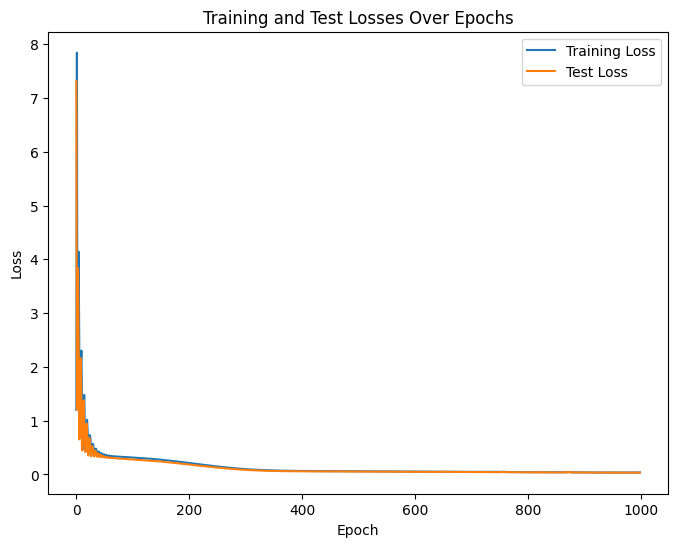

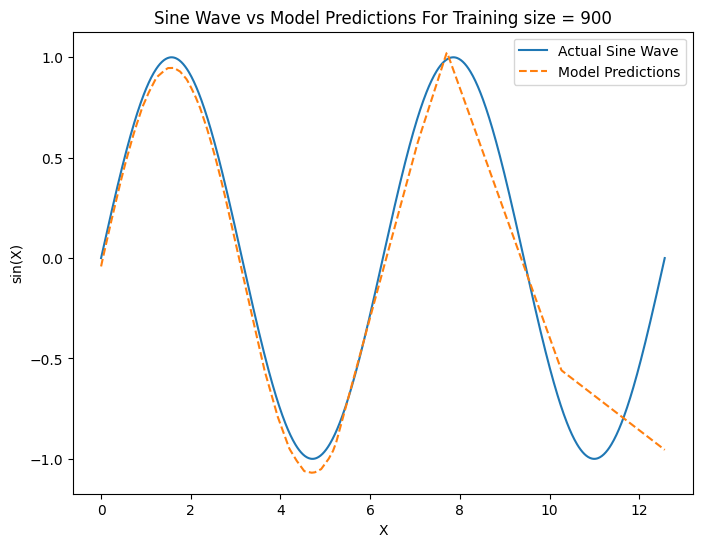

In [5]:

# Ensure reproducibility
random_state = 4
np.random.seed(random_state)
torch.manual_seed(random_state)
torch.cuda.manual_seed(random_state)
torch.cuda.manual_seed_all(random_state)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Generate sine wave data
num_points = 1000
x_values = np.linspace(0, 4*np.pi, num_points)
y_values = np.sin(x_values)
# Prepare the data
rgn = np.random.RandomState(random_state)
train_size = 900
data = np.stack((x_values, y_values), axis=1)
rgn.shuffle(data)
x_values_shuffled = data[:, 0]
y_values_shuffled = data[:, 1]
x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

X_train = torch.from_numpy(x_train).float().view(-1, 1)
Y_train = torch.from_numpy(y_train).float().view(-1, 1)
X_test = torch.from_numpy(x_test).float().view(-1, 1)
Y_test = torch.from_numpy(y_test).float().view(-1, 1)


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Input layer to first hidden layer
        self.fc1 = nn.Linear(1, 160)
        self.fc2 = nn.Linear(160, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()


class Training_FCN:
    def __init__(self,model,epochs= 1000, learning_rate= 0.01, random_state=None):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = model

    def fit(self, X_train, Y_train, X_test, Y_test):
        # Training loop
        self.shape = X_train.shape[0]
        self.train_losses = []
        self.test_losses = []

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        for epoch in range(self.epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_train)
            loss = criterion(outputs, Y_train)
            loss.backward()
            optimizer.step()
            self.train_losses.append(loss.item())

            self.model.eval()
            with torch.no_grad():
                test_predictions = self.model(X_test)
                test_loss = criterion(test_predictions, Y_test)
                self.test_losses.append(test_loss.item())
            if epoch % 100 == 99:
                print(f'Epoch {epoch+1}: Training Loss = {loss.item()}, Test Loss = {test_loss.item()}')
        return self

    def prediction(self):
        # Generate predictions for the entire dataset
        self.model.eval()
        with torch.no_grad():
            x_all = torch.from_numpy(np.linspace(0, 4*np.pi, self.shape)).float().view(-1, 1)
            predictions_all = self.model(x_all)
        # Convert to numpy for plotting
        self.x_all_np = x_all.numpy().flatten()
        self.predictions_all_np = predictions_all.numpy().flatten()
        return self

model1 = Training_FCN(model,epochs= 1000, learning_rate= 0.01, random_state=random_state)
model1.fit( X_train,Y_train, X_test, Y_test)

def plotsA (model, figsize=(8, 6)):
    model.prediction()
    # Plotting training and test losses
    plt.figure(figsize=(8, 6))
    plt.plot(model.train_losses, label='Training Loss')
    plt.plot(model.test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Test Losses Over Epochs')
    plt.legend(loc='upper right')
    plt.show()

    # Plotting the actual sine wave and the model's predictions
    plt.figure(figsize=(8, 6))
    plt.plot(model.x_all_np, np.sin(model.x_all_np), label='Actual Sine Wave')
    plt.plot(model.x_all_np, model.predictions_all_np, label='Model Predictions', linestyle='--')
    plt.xlabel('X')
    plt.ylabel('sin(X)')
    plt.title('Sine Wave vs Model Predictions For Training size = 900')
    plt.legend(loc='upper right')
    plt.show()

plotsA(model1)

## part B : Decreasing training set size

In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 160)
        self.fc2 = nn.Linear(160, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()


class Training_FCN:
    def __init__(self,model,epochs= 1000, learning_rate= 0.01, random_state=None):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = model

    def fit(self, X_train, Y_train, X_test, Y_test):
        # Training loop
        self.shape = X_train.shape[0]
        self.train_losses = []
        self.test_losses = []

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        for epoch in range(self.epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_train)
            loss = criterion(outputs, Y_train)
            loss.backward()
            optimizer.step()
            self.train_losses.append(loss.item())

            self.model.eval()
            with torch.no_grad():
                test_predictions = self.model(X_test)
                test_loss = criterion(test_predictions, Y_test)
                self.test_losses.append(test_loss.item())
            if epoch % 100 == 99:
                print(f'Epoch {epoch+1}: Training Loss = {loss.item()}, Test Loss = {test_loss.item()}')
        return self

    def prediction(self):
        # Generate predictions for the entire dataset
        self.model.eval()
        with torch.no_grad():
            x_all = torch.from_numpy(np.linspace(0, 4*np.pi, self.shape)).float().view(-1, 1)
            predictions_all = self.model(x_all)
        # Convert to numpy for plotting
        self.x_all_np = x_all.numpy().flatten()
        self.predictions_all_np = predictions_all.numpy().flatten()
        return self


Models = {}
for i in range(1, 10):
    # Ensure reproducibility
    random_state = 4
    np.random.seed(random_state)
    torch.manual_seed(random_state)
    torch.cuda.manual_seed(random_state)
    torch.cuda.manual_seed_all(random_state)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    num_points = 1000
    x_values = np.linspace(0, 4*np.pi, num_points)
    y_values = np.sin(x_values)

    rgn = np.random.RandomState(random_state)
    train_size = num_points - (100 * i)
    data = np.stack((x_values, y_values), axis=1)
    rgn.shuffle(data)
    x_values_shuffled = data[:, 0]
    y_values_shuffled = data[:, 1]
    x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
    y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

    X_train = torch.from_numpy(x_train).float().view(-1, 1)
    Y_train = torch.from_numpy(y_train).float().view(-1, 1)
    X_test = torch.from_numpy(x_test).float().view(-1, 1)
    Y_test = torch.from_numpy(y_test).float().view(-1, 1)

    print(f'Training model for iteration {i} -------------------------> size of training set = {train_size}')
    modeli = Training_FCN(SimpleNN(), epochs=1000, learning_rate=0.01, random_state=random_state)
    modeli.fit(X_train, Y_train, X_test, Y_test)
    Models[train_size] = modeli

# Plot the last training loss for each model
loss_for_all_iterations = [Model.train_losses[-1] for Model in Models.values()]
test_loss_for_all_iterations = [Model.test_losses[-1] for Model in Models.values()]

training_sizes = list(Models.keys())






Training model for iteration 1 -------------------------> size of training set = 900
Epoch 100: Training Loss = 0.3156708776950836, Test Loss = 0.28041917085647583
Epoch 200: Training Loss = 0.2143182009458542, Test Loss = 0.18549303710460663
Epoch 300: Training Loss = 0.09926121681928635, Test Loss = 0.08546055853366852
Epoch 400: Training Loss = 0.06441215425729752, Test Loss = 0.05787312611937523
Epoch 500: Training Loss = 0.0580429844558239, Test Loss = 0.053297098726034164
Epoch 600: Training Loss = 0.053149934858083725, Test Loss = 0.04959776997566223
Epoch 700: Training Loss = 0.04758070781826973, Test Loss = 0.04451935738325119
Epoch 800: Training Loss = 0.04220897704362869, Test Loss = 0.039764732122421265
Epoch 900: Training Loss = 0.03764631599187851, Test Loss = 0.03543170541524887
Epoch 1000: Training Loss = 0.03593958169221878, Test Loss = 0.03668811172246933
Training model for iteration 2 -------------------------> size of training set = 800
Epoch 100: Training Loss = 0.

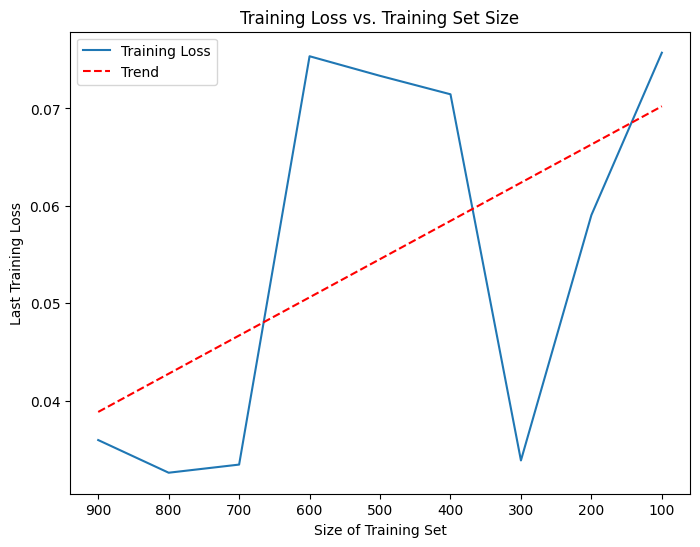

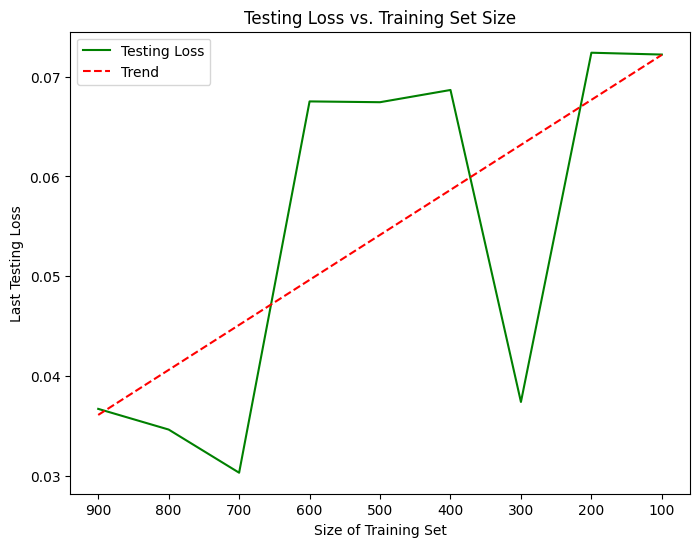

In [7]:
# Plot for Training Loss
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, loss_for_all_iterations, label='Training Loss')
# Calculate and plot the trend line for Training Loss
z = np.polyfit(training_sizes, loss_for_all_iterations, 1)  # Linear fit
p = np.poly1d(z)
plt.plot(training_sizes, p(training_sizes), "r--", label='Trend')
plt.xlabel('Size of Training Set')
plt.ylabel('Last Training Loss')
plt.title('Training Loss vs. Training Set Size')
plt.gca().invert_xaxis()  # Invert x-axis
plt.legend()
plt.show()

# Plot for Testing Loss
plt.figure(figsize=(8, 6))
plt.plot(training_sizes, test_loss_for_all_iterations, 'g', label='Testing Loss')
# Calculate and plot the trend line for Testing Loss
z_test = np.polyfit(training_sizes, test_loss_for_all_iterations, 1)  # Linear fit
p_test = np.poly1d(z_test)
plt.plot(training_sizes, p_test(training_sizes), "r--", label='Trend')
plt.xlabel('Size of Training Set')
plt.ylabel('Last Testing Loss')
plt.title('Testing Loss vs. Training Set Size')
plt.gca().invert_xaxis()  # Invert x-axis
plt.legend()
plt.show()

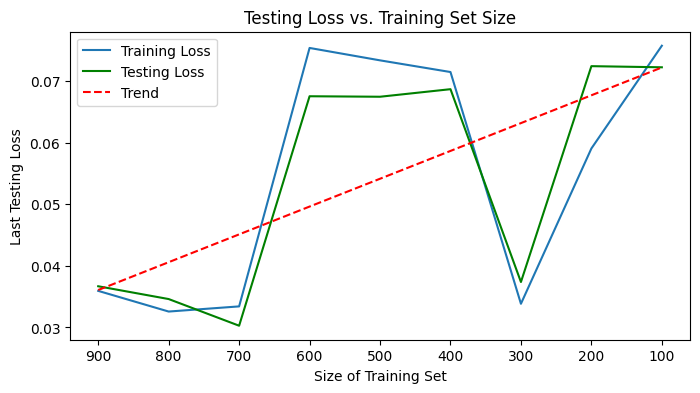

In [26]:
# Plot for Training Loss
plt.figure(figsize=(8, 4))
plt.plot(training_sizes, loss_for_all_iterations, label='Training Loss')
# Calculate and plot the trend line for Training Loss
z = np.polyfit(training_sizes, loss_for_all_iterations, 1)  # Linear fit
p = np.poly1d(z)

plt.plot(training_sizes, test_loss_for_all_iterations, 'g', label='Testing Loss')
# Calculate and plot the trend line for Testing Loss
z_test = np.polyfit(training_sizes, test_loss_for_all_iterations, 1)  # Linear fit
p_test = np.poly1d(z_test)
plt.plot(training_sizes, p_test(training_sizes), "r--", label='Trend')
plt.xlabel('Size of Training Set')
plt.ylabel('Last Testing Loss')
plt.title('Testing Loss vs. Training Set Size')
plt.gca().invert_xaxis()  # Invert x-axis
plt.legend()
plt.show()

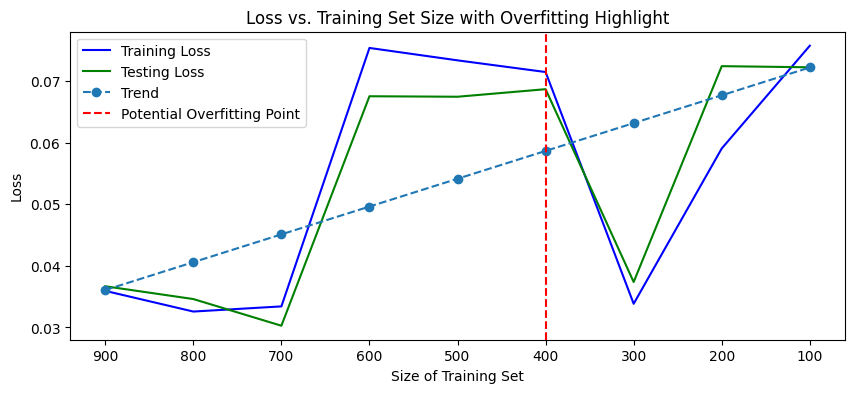

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))

# Assuming training_sizes, loss_for_all_iterations (Training Loss),
# and test_loss_for_all_iterations (Testing Loss) are defined.
plt.plot(training_sizes, loss_for_all_iterations, 'b', label='Training Loss')

# Trend line for Training Loss
z = np.polyfit(training_sizes, loss_for_all_iterations, 1)
p = np.poly1d(z)

plt.plot(training_sizes, test_loss_for_all_iterations, 'g', label='Testing Loss')

# Trend line for Testing Loss
z_test = np.polyfit(training_sizes, test_loss_for_all_iterations, 1)
p_test = np.poly1d(z_test)
plt.plot(training_sizes, p_test(training_sizes), "o--", label='Trend')

# Highlight potential overfitting area
# Here you might want to identify the point of divergence manually or programmatically
divergence_point = 400  # Example: assuming 400 is where testing loss stops decreasing
plt.axvline(x=divergence_point, color='r', linestyle='--', label='Potential Overfitting Point')

plt.xlabel('Size of Training Set')
plt.ylabel('Loss')
plt.title('Loss vs. Training Set Size with Overfitting Highlight')
plt.gca().invert_xaxis()  # Invert x-axis to show decreasing training set sizes
plt.legend()
plt.show()


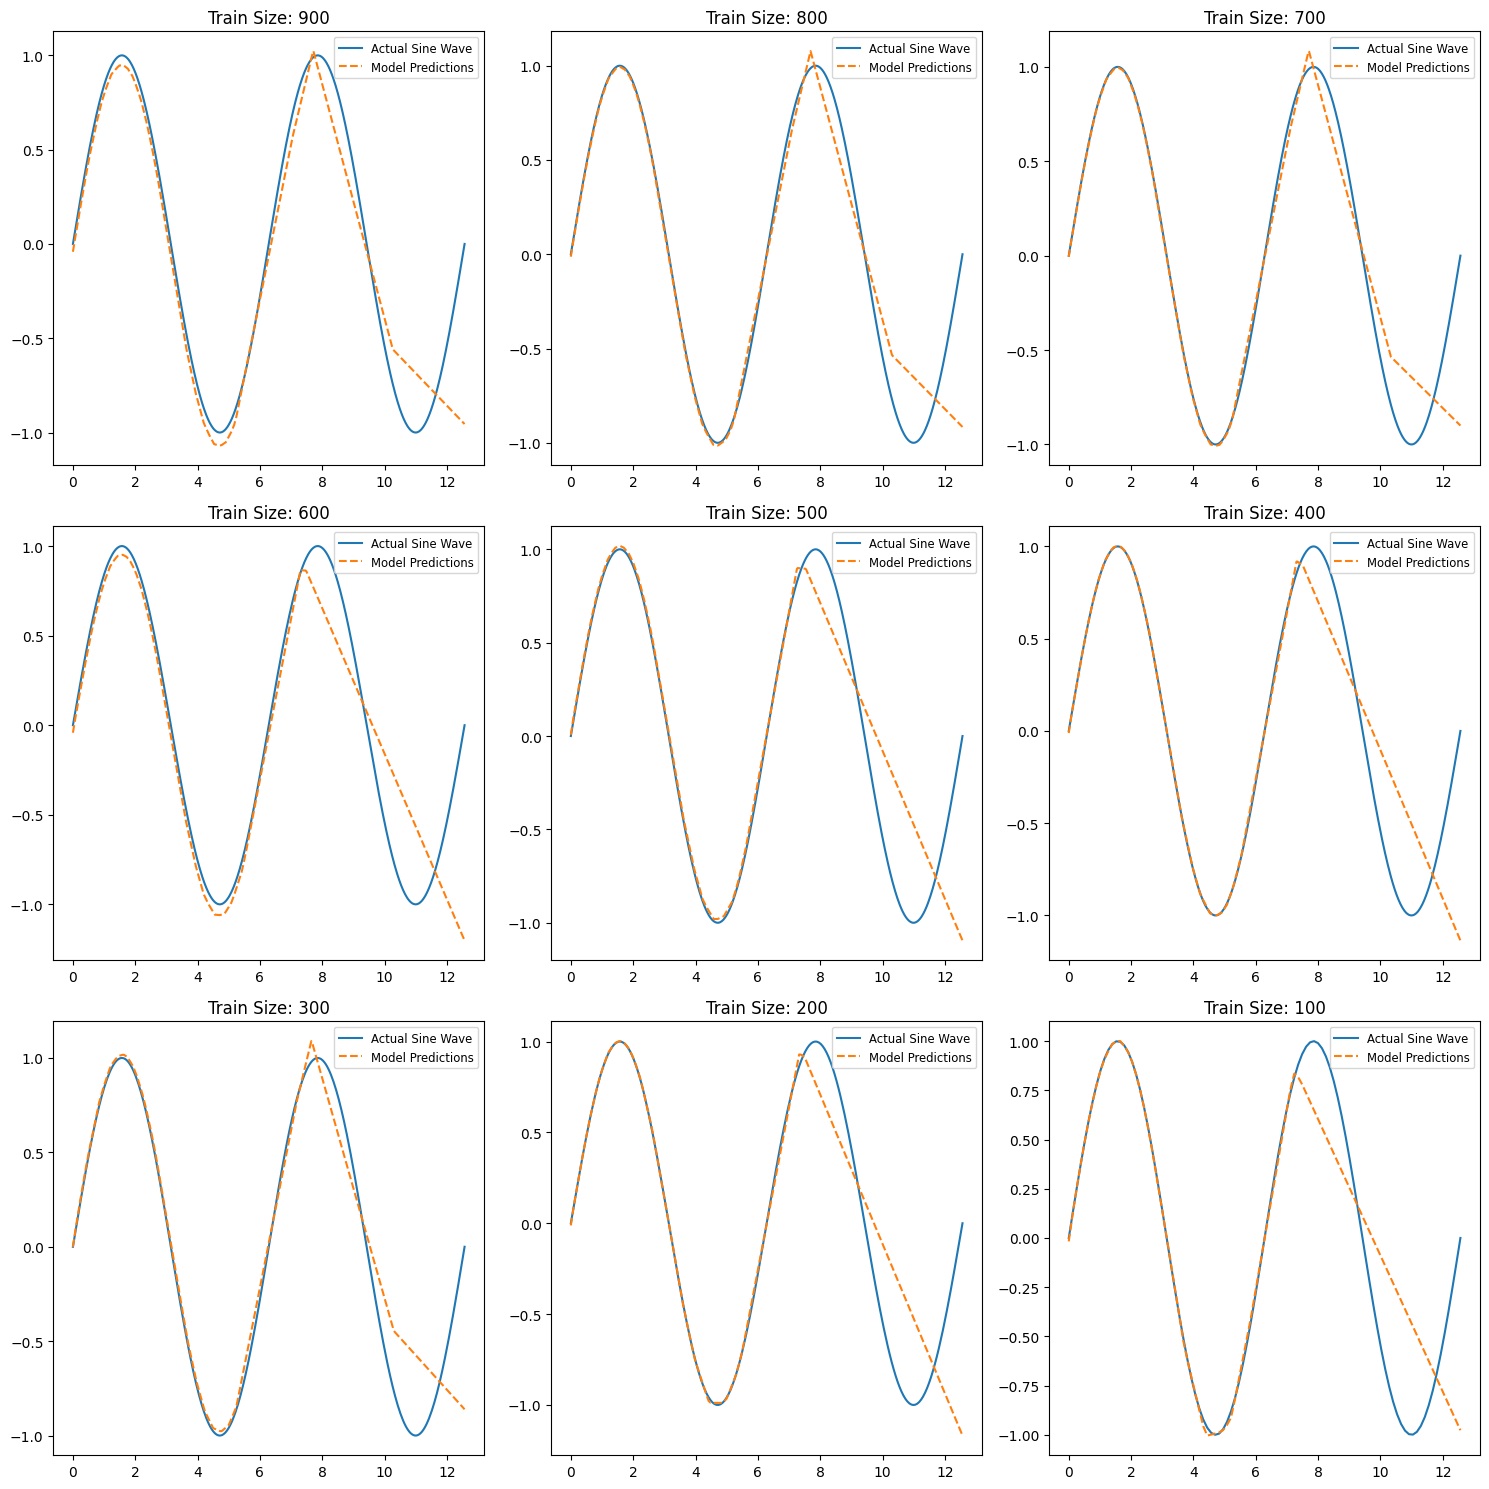

In [9]:
import matplotlib.pyplot as plt

# Assuming `Models` dictionary is filled with your models and predictions are ready
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over it

# Sort the models by their training set size to plot them in order
sorted_models = sorted(Models.items(), key=lambda x: x[0], reverse=True)

for index, (train_size, model) in enumerate(sorted_models):
    # Generate predictions if not already done
    model.prediction()
    x_all_np = model.x_all_np
    predictions_all_np = model.predictions_all_np

    # Plotting on the respective subplot
    axs[index].plot(x_all_np, np.sin(x_all_np), label='Actual Sine Wave')
    axs[index].plot(x_all_np, predictions_all_np, label='Model Predictions', linestyle='--')
    axs[index].set_title(f'Train Size: {train_size}')
    # Adjust legend to use a smaller font size
    axs[index].legend(loc='upper right', fontsize='small')  # You can also use specific sizes like '10', 'x-small', etc.

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### showing in the GIF form with decreasing the training set size!

In [10]:
pip install imageio


<ipython-input-11-45ef3fd71ae9>:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


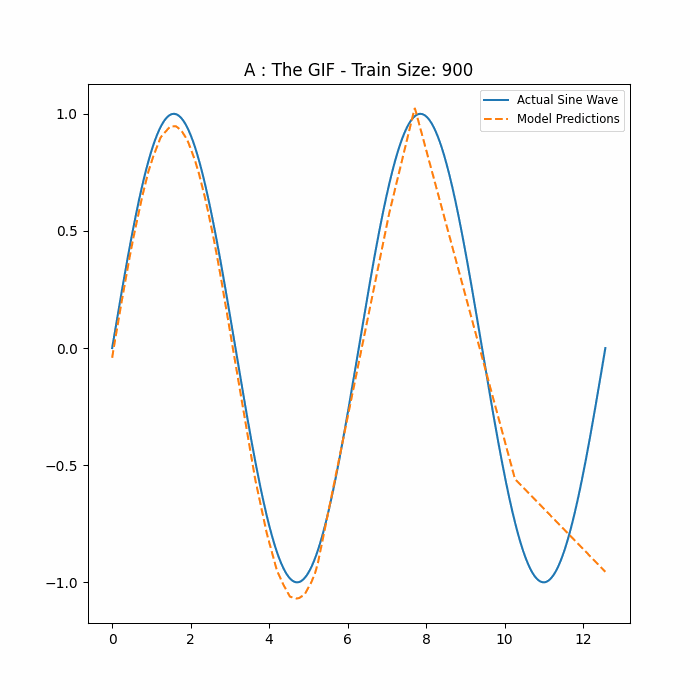

In [11]:
import imageio
import os
from IPython.display import Image

os.makedirs('plots', exist_ok=True)
filenames = []

for index, (train_size, model) in enumerate(sorted_models):
    fig, ax = plt.subplots(figsize=(7, 7))
    model.prediction()
    ax.plot(model.x_all_np, np.sin(model.x_all_np), label='Actual Sine Wave')
    ax.plot(model.x_all_np, model.predictions_all_np, label='Model Predictions', linestyle='--')
    ax.set_title(f'A : The GIF - Train Size: {train_size}')
    ax.legend(loc='upper right', fontsize='small')
    filename = f'plots/plot_{index}.png'
    filenames.append(filename)
    # Save the plot
    plt.savefig(filename)
    plt.close()  # Close the plot to free memory

with imageio.get_writer('model_predictions.gif', mode='I', duration=1500) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, remove the saved plot images to clean up
for filename in filenames:
    os.remove(filename)

# Display the GIF
Image(filename='model_predictions.gif')


# part C : increasing numbers of hidden layers

In [12]:
# Check if CUDA is available and set the device
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


Model with 1 hidden layer architecture:
DynamicNN(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)

Model with 20 hidden layers architecture:
DynamicNN(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=64, bias=True)
    (13): ReLU()
    (14): Linear(in_features=64, out_features=64, bias=True)
    (15): ReLU()
    (16): Linear(in_features=64, out_features=64, bias=True)
    (17): ReLU()
    (18): Linear

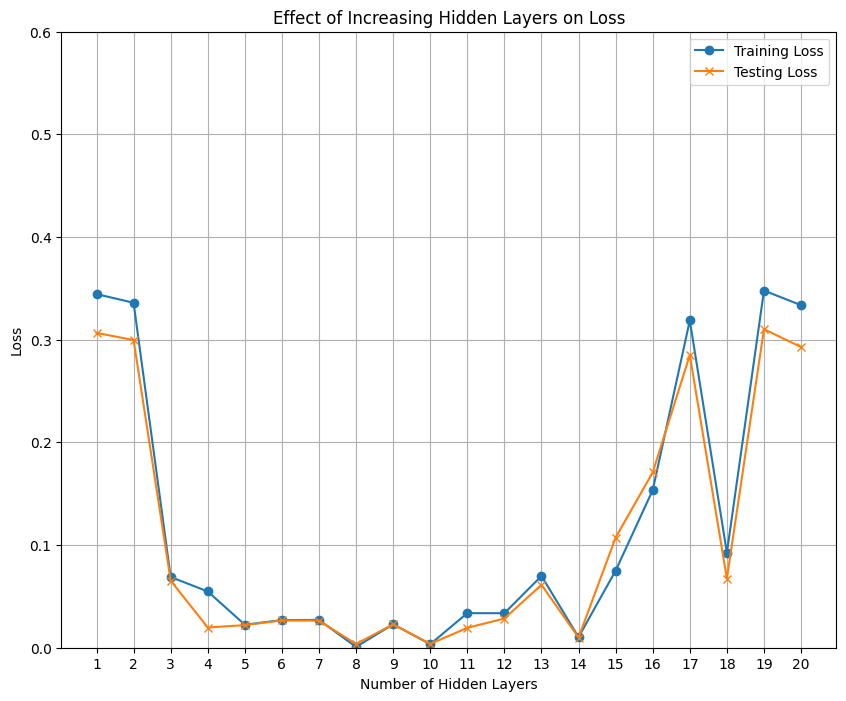

[0.34444451332092285, 0.3360093832015991, 0.06888461112976074, 0.05481448024511337, 0.02239687368273735, 0.026960372924804688, 0.027083605527877808, 0.0007968442514538765, 0.02280092053115368, 0.0034500942565500736, 0.033675238490104675, 0.033628374338150024, 0.06989260017871857, 0.010295153595507145, 0.07508502900600433, 0.15353739261627197, 0.31876736879348755, 0.09252430498600006, 0.3479011654853821, 0.33362874388694763]
[0.3066224455833435, 0.299703985452652, 0.06535740941762924, 0.019686933606863022, 0.02201663888990879, 0.026582440361380577, 0.026359889656305313, 0.003639163915067911, 0.02280319109559059, 0.003688216209411621, 0.019370591267943382, 0.028435751795768738, 0.06125396490097046, 0.009911379776895046, 0.10734235495328903, 0.1708100438117981, 0.28500181436538696, 0.06740059703588486, 0.31031450629234314, 0.29283031821250916]


In [13]:
class DynamicNN(nn.Module):
    def __init__(self, num_hidden_layers):
        super(DynamicNN, self).__init__()
        input_size = 1
        hidden_size = 64
        output_size = 1

        layers = [nn.Linear(input_size, hidden_size), nn.ReLU()]
        for _ in range(num_hidden_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_size, output_size))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

models_with_different_layers = []

for i in range(1, 21):
    model = DynamicNN(num_hidden_layers=i).to(device)  # Move model to the appropriate device
    models_with_different_layers.append(model)

print("Model with 1 hidden layer architecture:")
print(models_with_different_layers[0])
print("\nModel with 20 hidden layers architecture:")
print(models_with_different_layers[-1])

class Training_FCN:
    def __init__(self,model,epochs= 32, learning_rate= 0.01, random_state=None):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.random_state = random_state
        self.model = model.to(device)  # Ensure model is on the correct device

    def fit(self, X_train, Y_train, X_test, Y_test):
        # Training loop
        self.shape = X_train.shape[0]
        self.train_losses = []
        self.test_losses = []

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        for epoch in range(self.epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X_train)
            loss = criterion(outputs, Y_train)
            loss.backward()
            optimizer.step()
            self.train_losses.append(loss.item())

            self.model.eval()
            with torch.no_grad():
                test_predictions = self.model(X_test)
                test_loss = criterion(test_predictions, Y_test)
                self.test_losses.append(test_loss.item())
            if epoch % 100 == 99:
                print(f'Epoch {epoch+1}: Training Loss = {loss.item()}, Test Loss = {test_loss.item()}')
        return self

    def prediction(self, x_values):
        # Ensure this method accepts external inputs for flexibility
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(x_values.to(device))
        return predictions.cpu()

Models = {}

# Ensure reproducibility
random_state = 4
np.random.seed(random_state)
torch.manual_seed(random_state)
torch.cuda.manual_seed(random_state)
torch.cuda.manual_seed_all(random_state)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

num_points = 1000
x_values = np.linspace(0, 4*np.pi, num_points)
y_values = np.sin(x_values)

rgn = np.random.RandomState(random_state)
train_size = 900
data = np.stack((x_values, y_values), axis=1)
rgn.shuffle(data)
x_values_shuffled = data[:, 0]
y_values_shuffled = data[:, 1]
x_train, x_test = x_values_shuffled[:train_size], x_values_shuffled[train_size:]
y_train, y_test = y_values_shuffled[:train_size], y_values_shuffled[train_size:]

X_train = torch.from_numpy(x_train).float().view(-1, 1).to(device)
Y_train = torch.from_numpy(y_train).float().view(-1, 1).to(device)
X_test = torch.from_numpy(x_test).float().view(-1, 1).to(device)
Y_test = torch.from_numpy(y_test).float().view(-1, 1).to(device)

for i in range(1, 21):
    print(f'Training model for iteration {i} -------------------------> hidden layers = {i}')
    modeli = Training_FCN(models_with_different_layers[i-1], epochs=300, learning_rate=0.01, random_state=random_state)
    modeli.fit(X_train, Y_train, X_test, Y_test)
    Models[i] = modeli

# Prepare the data for plotting
hidden_layers = range(1, 21)  # Hidden layers from 1 to 20
training_losses = [Model.train_losses[-1] for Model in Models.values()]
testing_losses = [Model.test_losses[-1] for Model in Models.values()]


# Plot Training and Testing Losses
plt.figure(figsize=(10, 8))
plt.plot(hidden_layers, training_losses, label='Training Loss', marker='o')
plt.plot(hidden_layers, testing_losses, label='Testing Loss', marker='x')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Loss')
plt.ylim(0,0.6)
plt.title('Effect of Increasing Hidden Layers on Loss')
plt.xticks(hidden_layers)  # Ensure each hidden layer count is marked
plt.legend()
plt.grid(True)
plt.show()

print(training_losses)
print(testing_losses)

### part C : results of increasing the  numbers of hidden layers

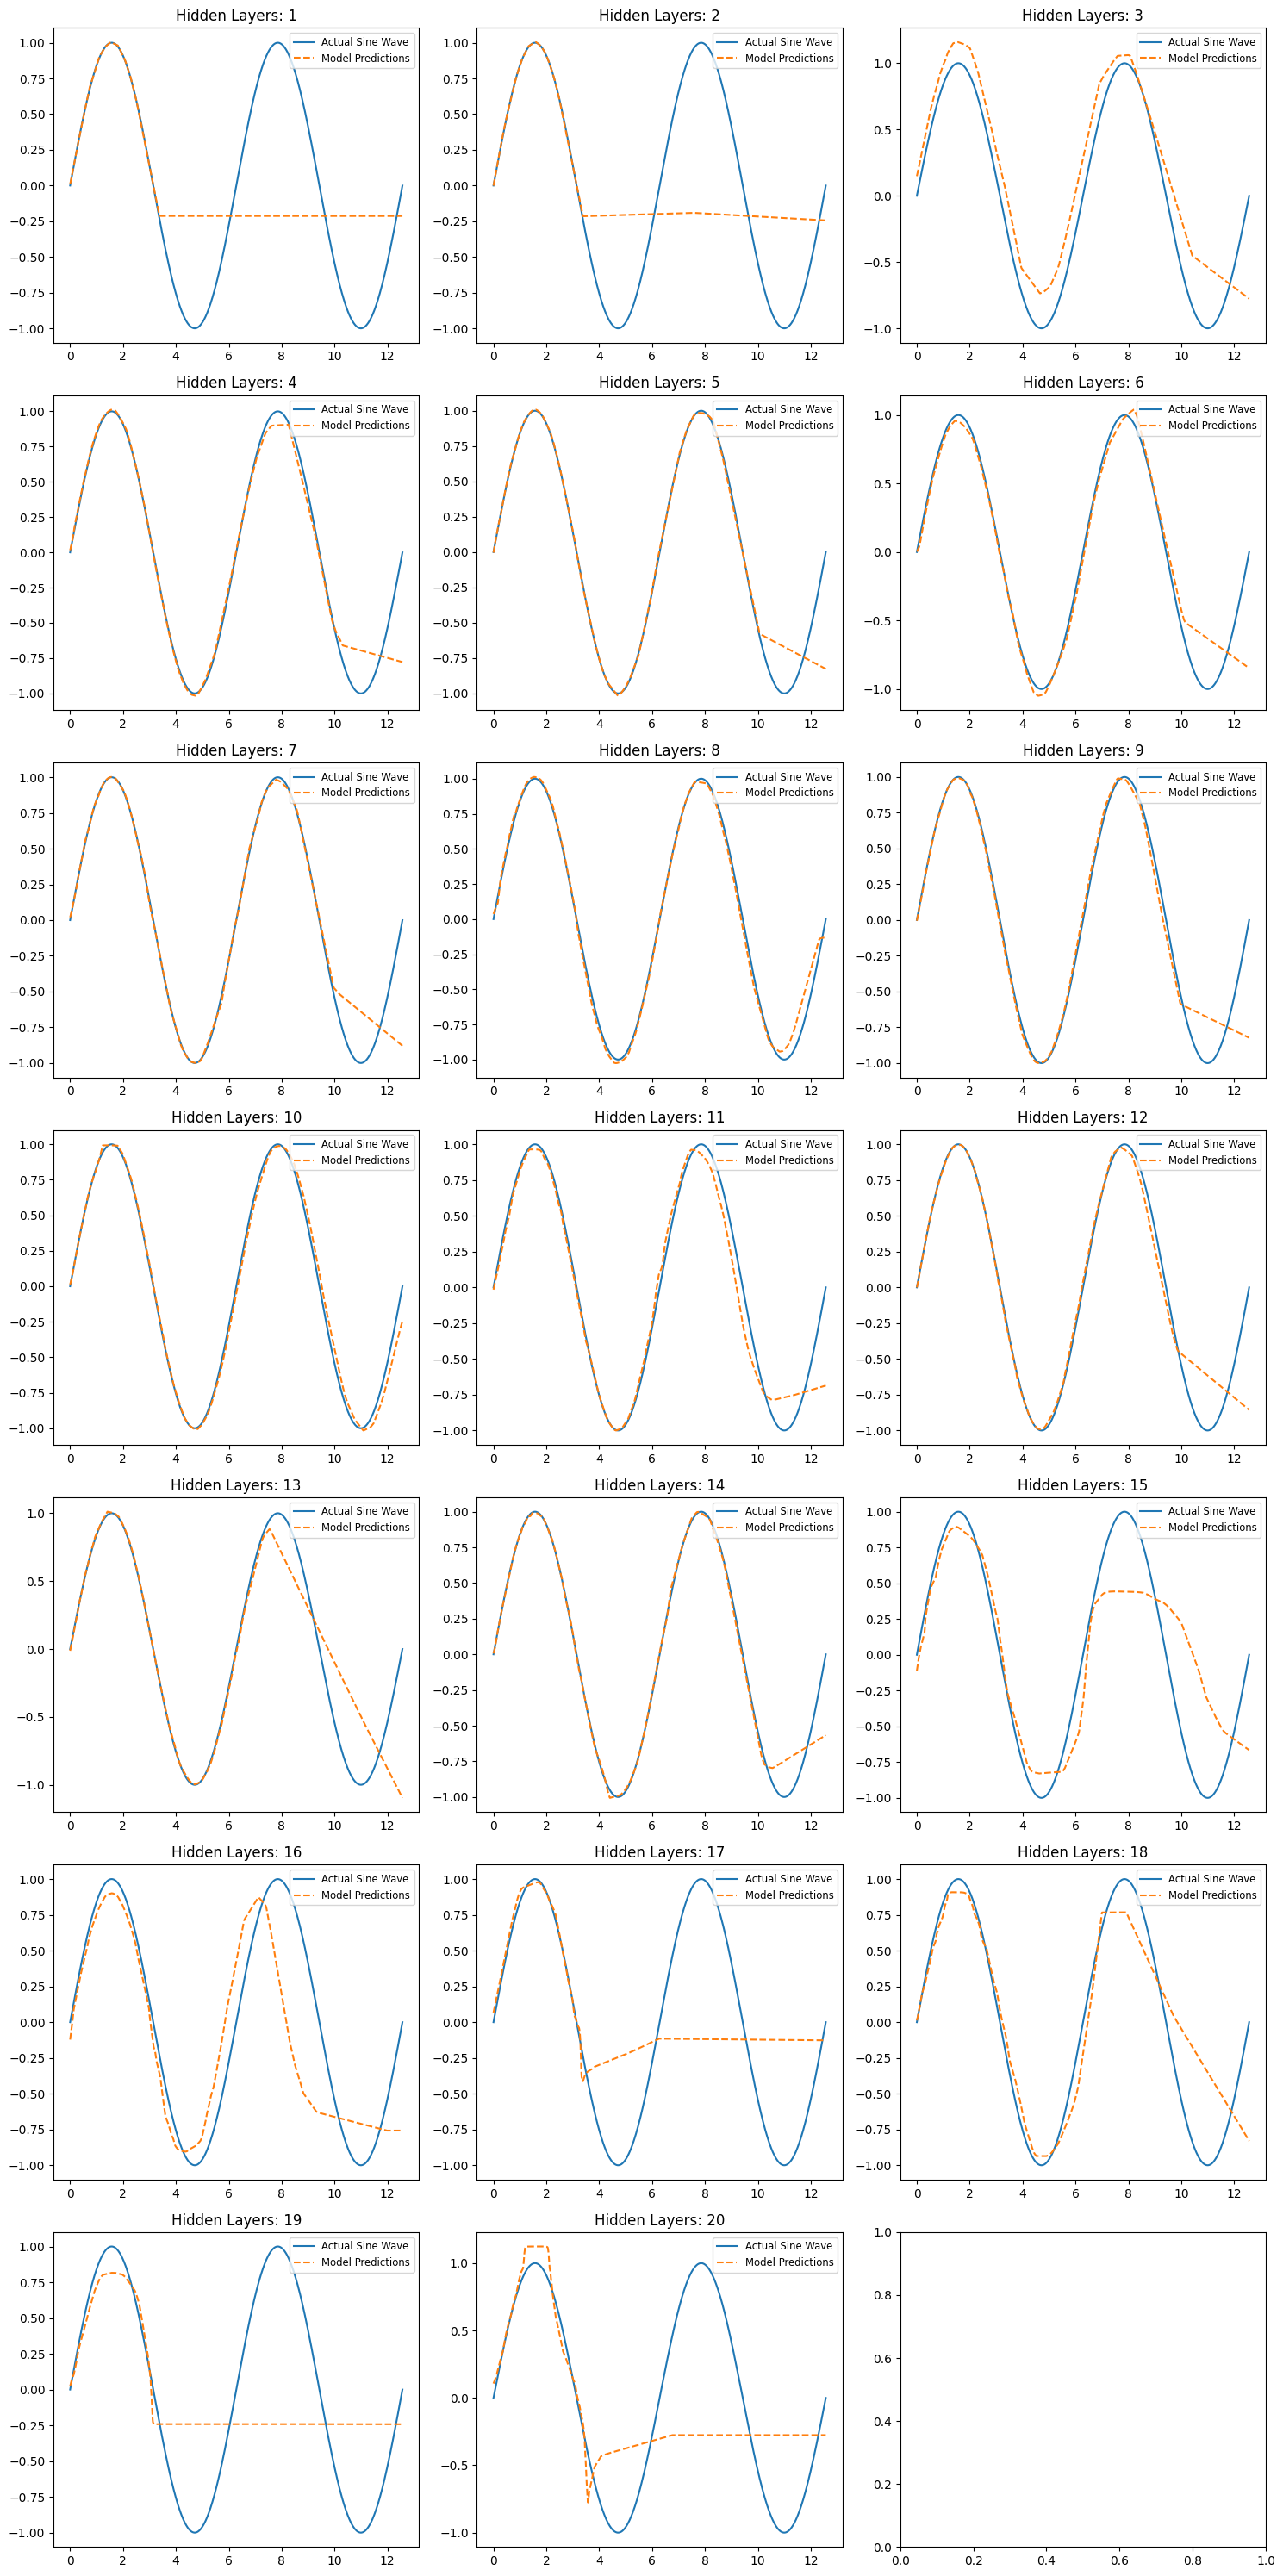

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Assuming 'Models' dictionary is filled with your models and their predictions are ready
# Also assuming the device setup as earlier
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Generate a new set of x values for predictions, covering the same range used in training
x_values_plot = np.linspace(0, 4*np.pi, 1000)
X_values_plot_tensor = torch.from_numpy(x_values_plot).float().view(-1, 1).to(device)

fig, axs = plt.subplots(7, 3, figsize=(15, 30))  # Create a 3x3 grid of subplots
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over it

# It's no longer about sorting by training set size but by the number of hidden layers
# Assuming 'Models' contains models indexed by their hidden layer count
for index, (hidden_layer_count, model) in enumerate(Models.items()):
    # Use the prediction method you adjusted earlier
    predictions_all = model.prediction(X_values_plot_tensor).cpu().numpy().flatten()

    # Plotting on the respective subplot
    axs[index].plot(x_values_plot, np.sin(x_values_plot), label='Actual Sine Wave')
    axs[index].plot(x_values_plot, predictions_all, label='Model Predictions', linestyle='--')
    axs[index].set_title(f'Hidden Layers: {hidden_layer_count}')
    axs[index].legend(loc='upper right', fontsize='small')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


<ipython-input-15-bce31d698bf6>:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


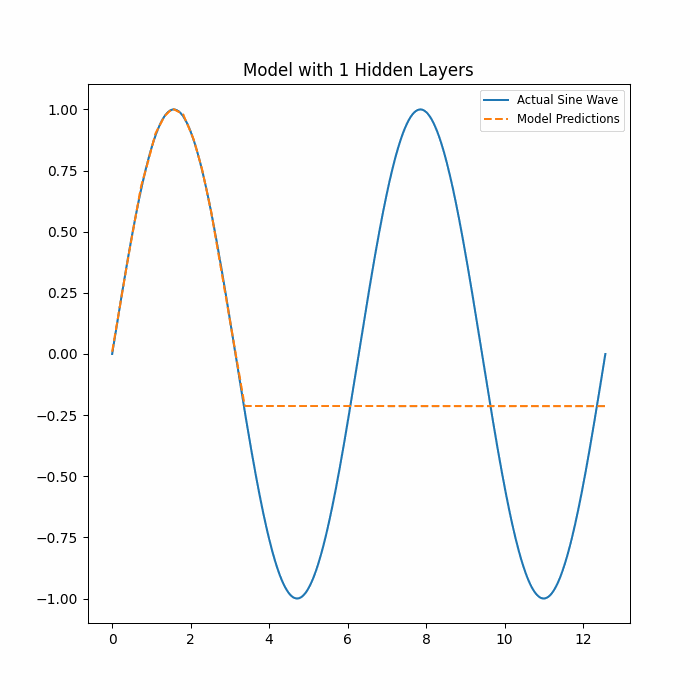

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import imageio
import os
from IPython.display import Image

# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_values_plot = np.linspace(0, 4 * np.pi, 1000)
X_values_plot_tensor = torch.from_numpy(x_values_plot).float().view(-1, 1).to(device)

# Create directory for plots
os.makedirs('plots', exist_ok=True)
filenames = []

# Generate plots
for index, (hidden_layer_count, model) in enumerate(sorted(Models.items(), key=lambda x: x[0])):
    fig, ax = plt.subplots(figsize=(7, 7))
    predictions_all = model.prediction(X_values_plot_tensor).cpu().numpy().flatten()
    ax.plot(x_values_plot, np.sin(x_values_plot), label='Actual Sine Wave')
    ax.plot(x_values_plot, predictions_all, label='Model Predictions', linestyle='--')
    ax.set_title(f'Model with {hidden_layer_count} Hidden Layers')
    ax.legend(loc='upper right', fontsize='small')

    # Save each plot
    filename = f'plots/model_{hidden_layer_count}_layers.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

# Create GIF
gif_filename = 'model_predictions2.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up saved images
for filename in filenames:
    os.remove(filename)

# Display the GIF
Image(filename='model_predictions2.gif')

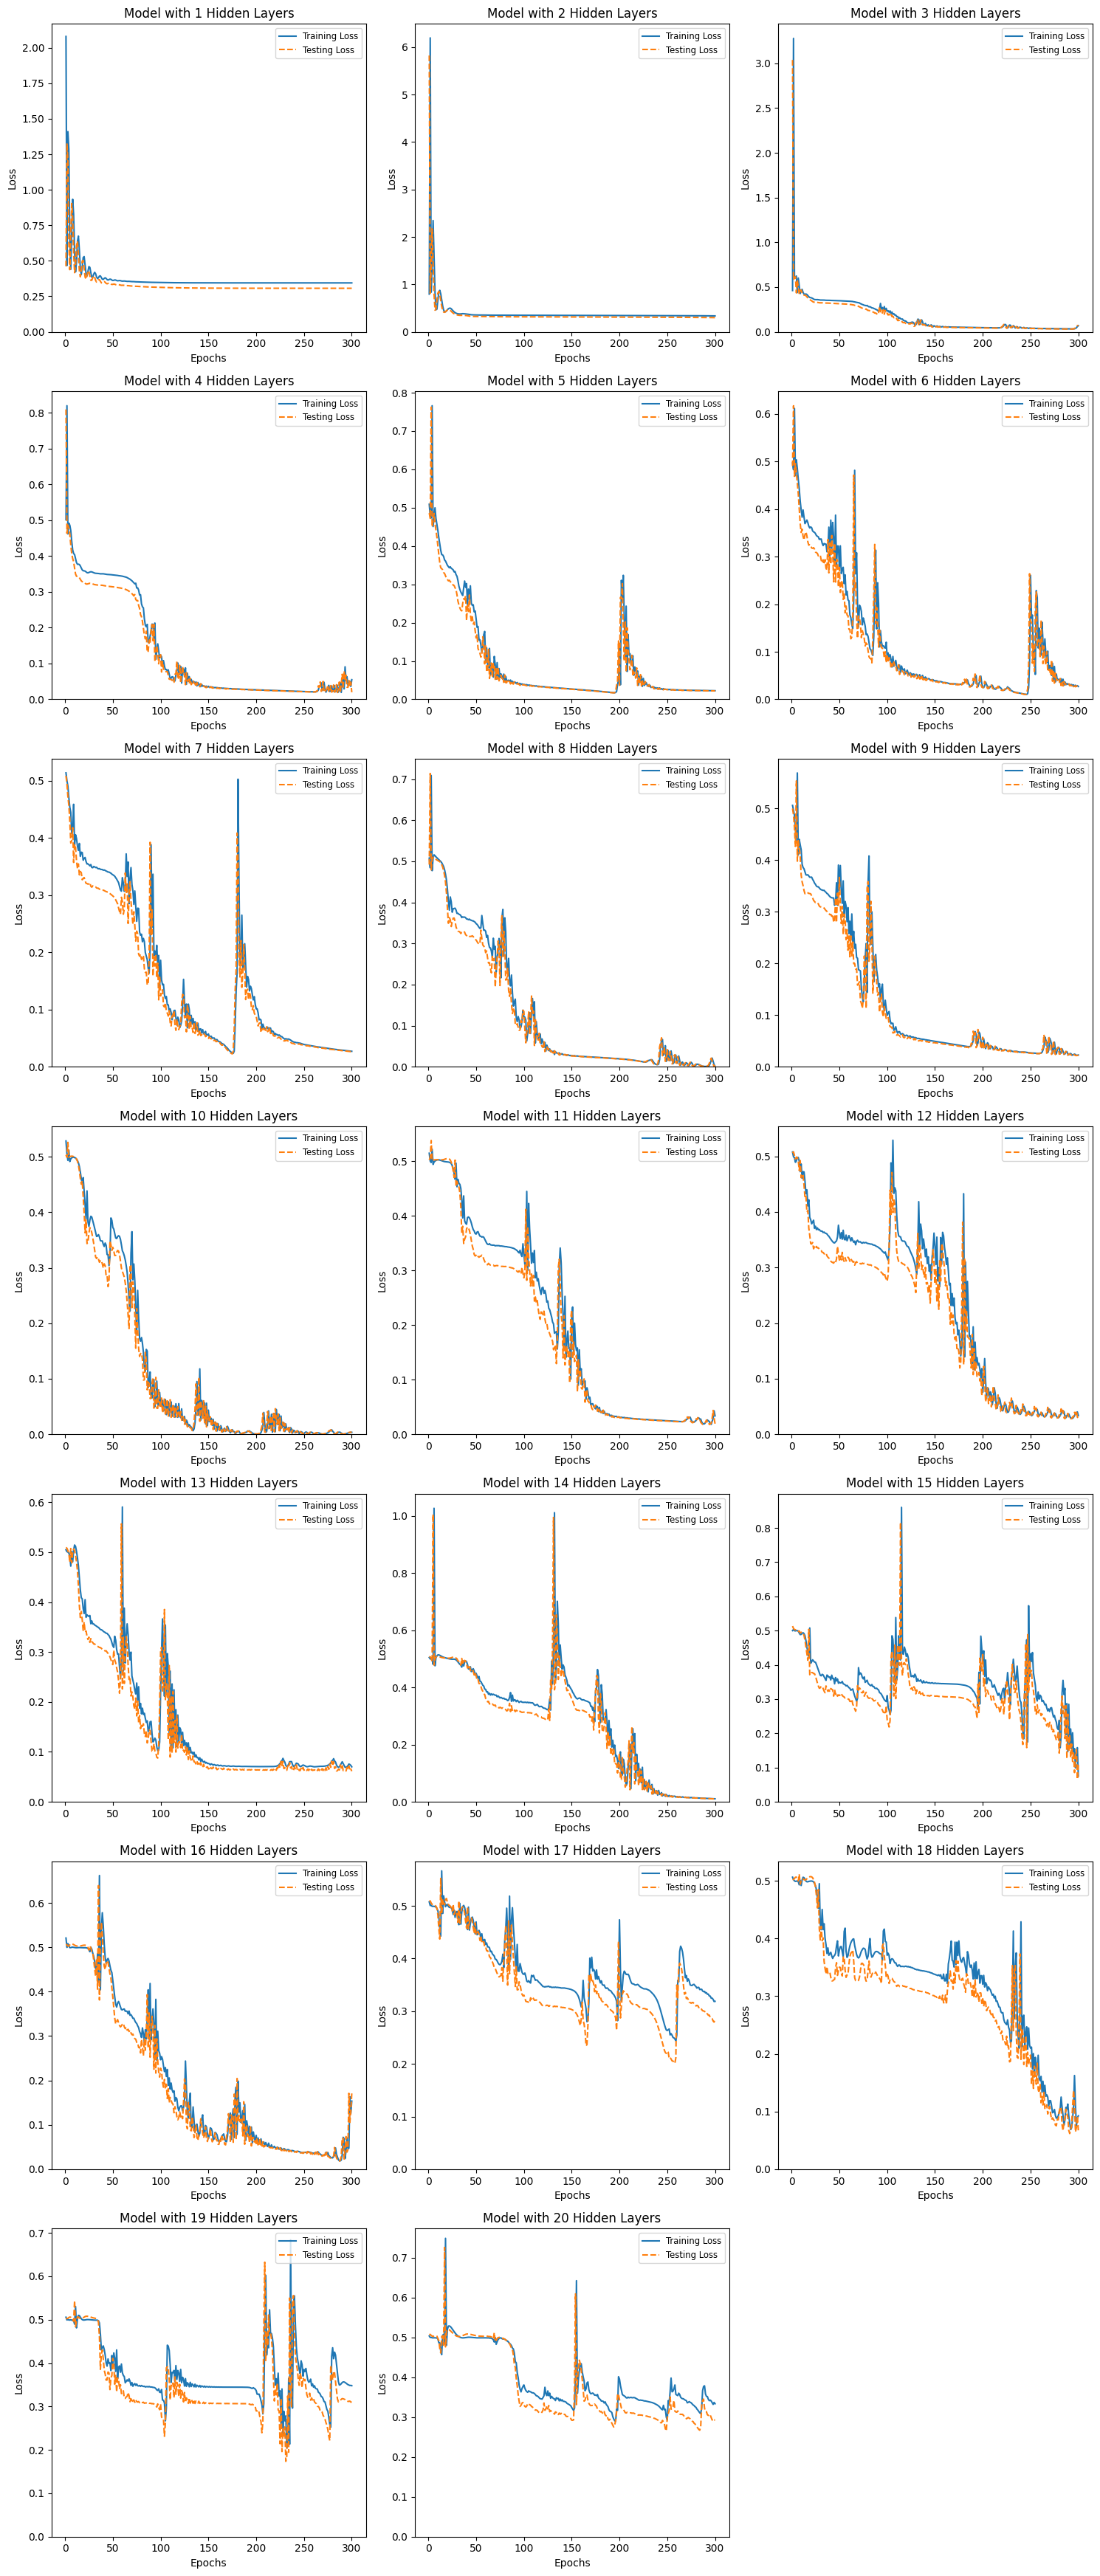

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Models' dictionary is filled with your models
# and each model has 'train_losses' and 'test_losses' attributes
# The device setup is assumed as earlier

fig, axs = plt.subplots(7, 3, figsize=(15, 35))  # Adjust the subplot grid if needed
axs = axs.flatten()  # Flatten the 2D array of axes to easily iterate over it

# Iterate through the models, sorted by the number of hidden layers (key in Models)
for index, (hidden_layer_count, model) in enumerate(sorted(Models.items())):
    # Access the stored losses
    train_losses = model.train_losses
    test_losses = model.test_losses

    # Plotting on the respective subplot
    epochs = range(1, len(train_losses) + 1)
    axs[index].plot(epochs, train_losses, label='Training Loss')
    axs[index].plot(epochs, test_losses, label='Testing Loss', linestyle='--')
    axs[index].set_title(f'Model with {hidden_layer_count} Hidden Layers')
    axs[index].set_xlabel('Epochs')
    axs[index].set_ylabel('Loss')
    axs[index].legend(loc='upper right', fontsize='small')

    # Set the minimum y-axis limit to 0 for all plots
    axs[index].set_ylim(bottom=0)

# Remove unused subplots if any
for ax in axs[index + 1:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


### part C : Gif of losses

<ipython-input-17-d9c161926dc7>:35: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


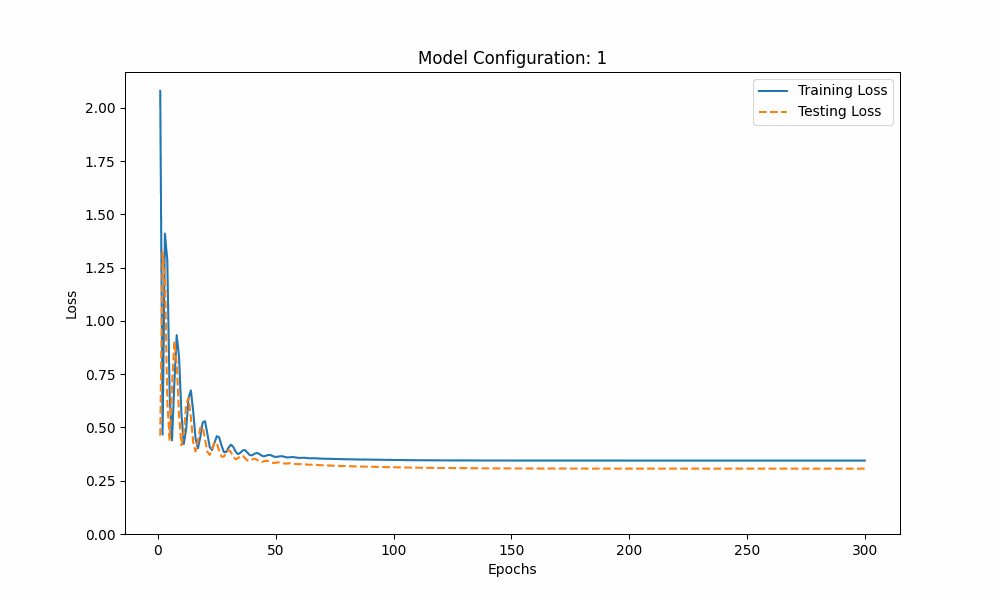

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
from IPython.display import Image

# Assuming 'Models' dictionary is filled with your models
# Each model should have 'train_losses' and 'test_losses' attributes

# Create directory for plots
os.makedirs('plots', exist_ok=True)
filenames = []

# Generate and save loss plots for each model configuration
for index, (config_key, model) in enumerate(sorted(Models.items(), key=lambda x: x[0])):
    fig, ax = plt.subplots(figsize=(10, 6))
    epochs = range(1, len(model.train_losses) + 1)
    ax.plot(epochs, model.train_losses, label='Training Loss')
    ax.plot(epochs, model.test_losses, linestyle='--', label='Testing Loss')
    ax.set_title(f'Model Configuration: {config_key}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_ylim(bottom=0)

    ax.legend(loc='upper right')
    filename = f'plots/loss_plot_{config_key}.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

# Create GIF from saved images
gif_filename = 'loss_plots.gif'
with imageio.get_writer(gif_filename, mode='I', duration=1000) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Optionally, remove the saved plot images to clean up
for filename in filenames:
    os.remove(filename)

# Display the GIF
Image(filename=gif_filename)
